<a href="https://colab.research.google.com/github/joseannerm/Flowise/blob/main/titanicjrm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3338212099.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages
/tmp/ipython-input-3338212099.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion Matrix:
[[140  17]
 [ 31  80]]
Decision Tree Rules:
|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 149.04
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  149.04
|   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  36.50
|   |   |   |   |--- class: 0
|   |   |--- Fare >  23.35
|   |   |   |--- Age <= 7.00
|   |   |   |   |--- cla

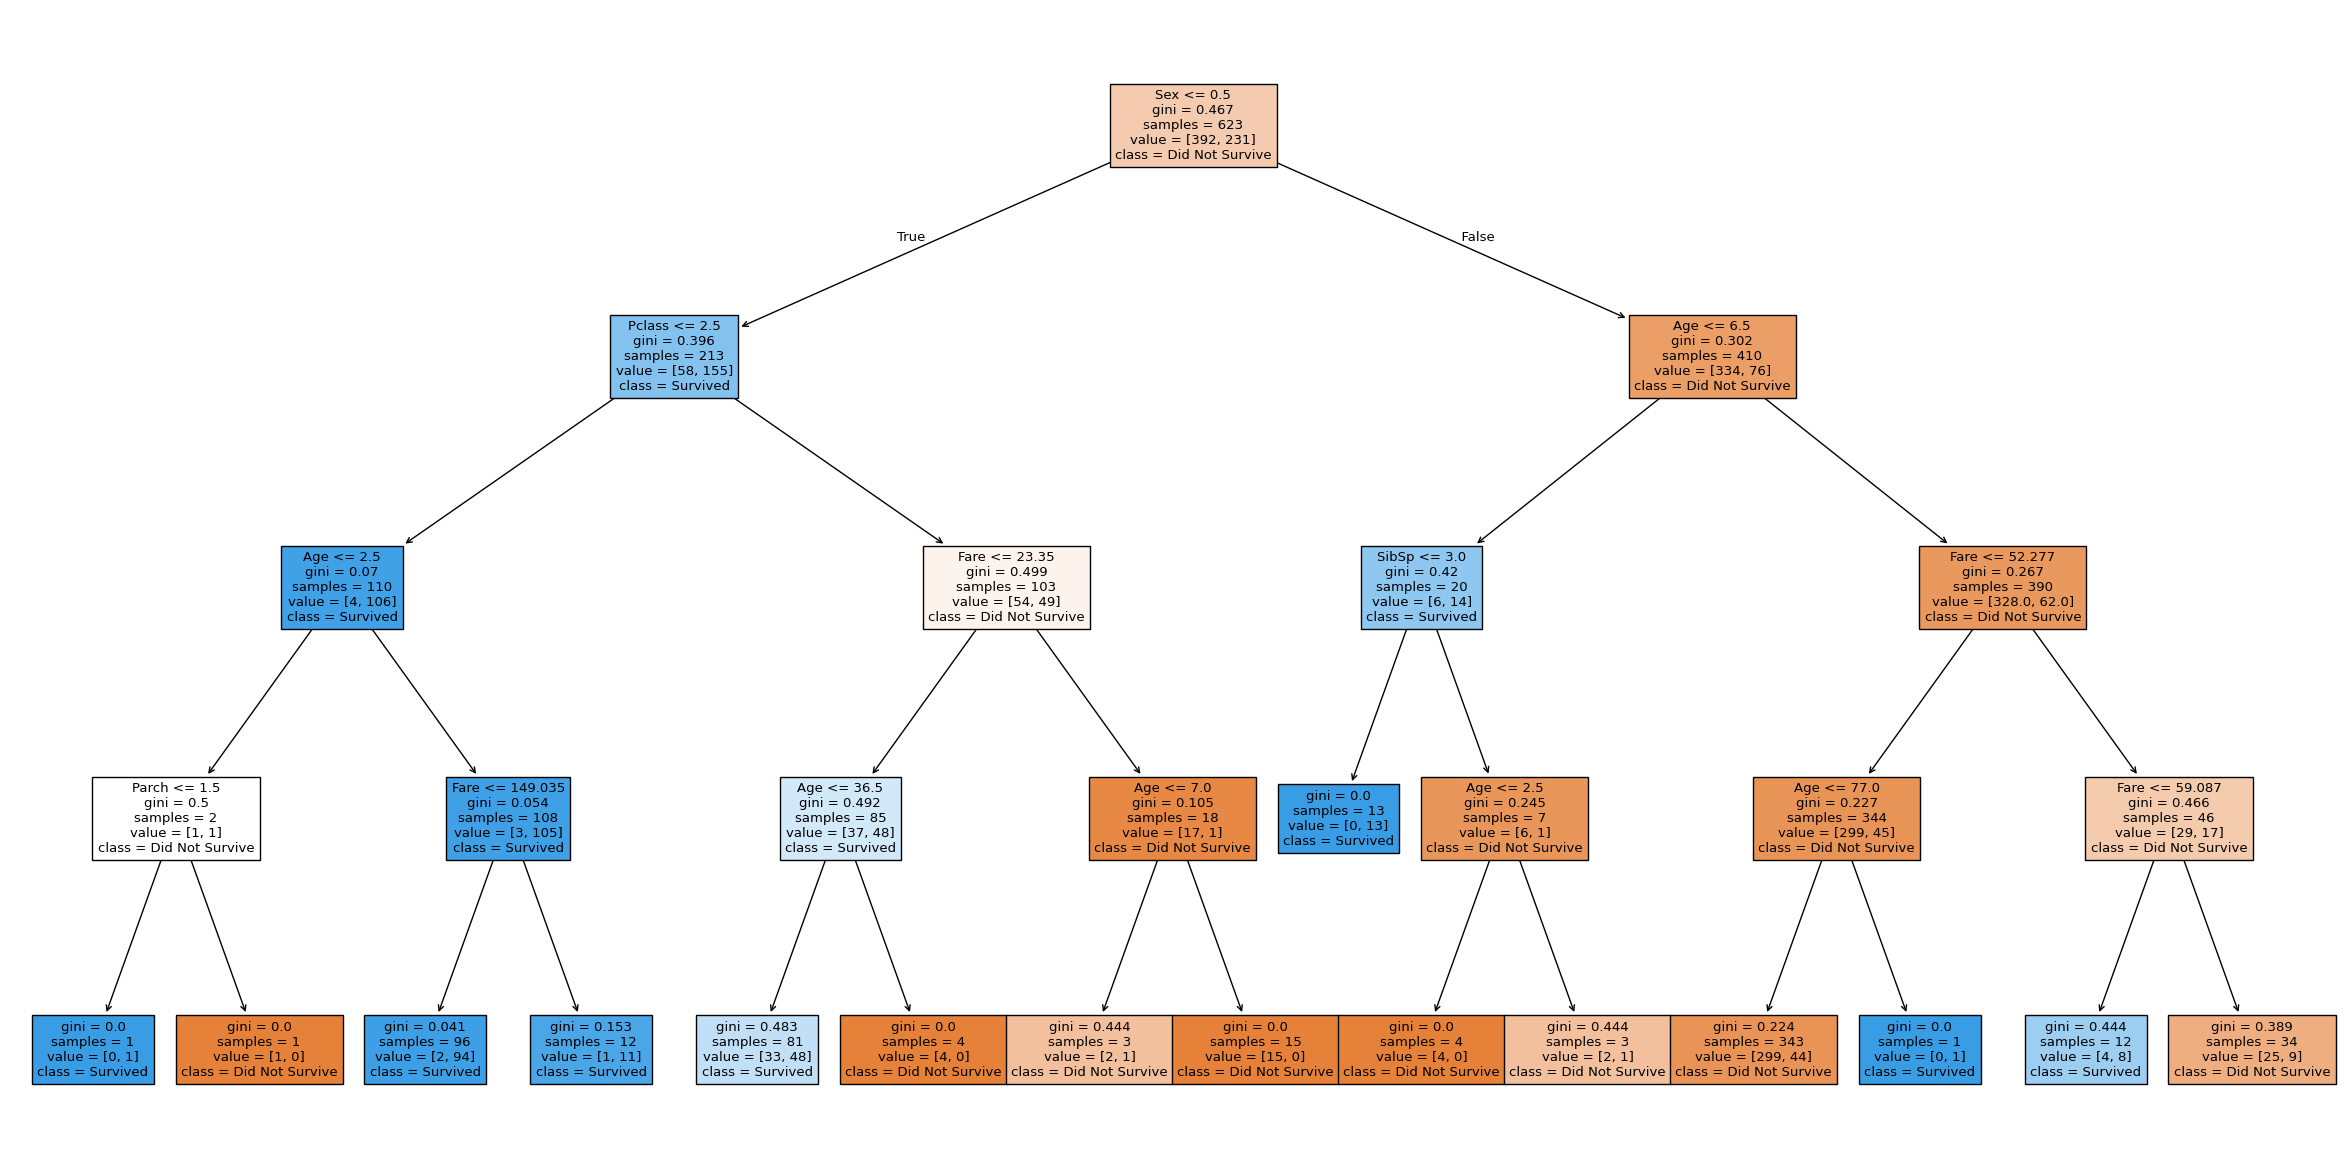

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/Titanic.csv")

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing embarked
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing fares

# Encode categorical variables
le_sex = preprocessing.LabelEncoder()
le_embarked = preprocessing.LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree (text format)
tree_rules = export_text(tree_clf, feature_names=features)
print("Decision Tree Rules:")
print(tree_rules)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

# Plot the decision tree visualization
plt.figure(figsize=(30, 15))
plot_tree(tree_clf, feature_names=features, class_names=['Did Not Survive', 'Survived'], filled=True)
plt.show()